# Final Project Notebook — Aidan Qadi

_Date: August 17, 2025_


The notebook is designed as an end-to-end retail data analysis project.
Its main purpose is to help an online retail company optimize its business strategy by:

Analyzing product performance – identifying which products generate the most revenue.

Understanding sales trends – uncovering seasonal or time-based sales patterns.

Segmenting customers (RFM analysis) – grouping customers by Recency, Frequency, and Monetary value to guide targeted marketing.

Exploring international markets – finding which countries outside the UK contribute most to revenue.

Studying price–volume dynamics – examining how unit prices affect quantities sold.

The notebook includes data loading, exploratory data analysis (EDA), cleaning, visualization, and business insights.




## 1) Project Overview

**Client (who benefits):**  An online retail company looking to optimize its product mix, customer outreach, and
international expansion

**Business context / value:** Inventory optimization through identification of best-selling items and seasonal trends
* Targeted marketing via customer segmentation (RFM)
* Strategic growth by pinpointing lucrative overseas markets
* Pricing strategy insights by understanding price–volume dynamics>_
**Questions to answer:
1. _Q1_ Which products generate the most revenue?
2. _Q2_  How do sales trend over time?

3. _Q3_  How can customers be segmented by RFM (Recency, Frequency, Monetary)?
4. _Q4_ 4. Which countries (outside the UK) contribute most to international revenue?
5. ._Q5_  What’s the relationship between unit price and quantity sold?

**Tools**
- Python (pandas, numpy, matplotlib)
- Jupyter Notebook
- Optional: seaborn, scikit


## Load your data

Choose one of the two options below:

- **Option A (Local path):** set `DATA_PATH` to your file (CSV or XLSX).
- **Option B (Colab upload):** leave `DATA_PATH=None` and run; you'll be prompted to upload.


In [6]:
import pandas as pd, io
from google.colab import files

uploaded = files.upload()               # pick your CSV
name = next(iter(uploaded))             # get filename
df = pd.read_csv(io.BytesIO(uploaded[name]), encoding='latin-1')  # load to DataFrame with specified encoding

print(df.shape)
df.head()

Saving Online Retail (1).csv to Online Retail (1) (1).csv
(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Milestone 2- EDA

In [7]:
# Basic shape & columns
try:
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
except NameError:
    print("⚠️ Define df first in the Data Loading section.")

# Types, info, samples
try:
    print("\nDTypes:")
    print(df.dtypes)
    print("\nInfo:")
    print(df.info())
    display(df.head(10))
    display(df.tail(5))
    display(df.sample(min(5, len(df))))
except Exception as e:
    print("EDA preview error:", e)

# Descriptive statistics (numeric & object separately for clarity)
try:
    display(df.describe(include=[np.number]).T)
    display(df.describe(include=[object]).T)
except Exception as e:
    print("Describe error:", e)


Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

DTypes:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
58255,541223,84992,72 SWEETHEART FAIRY CAKE CASES,3,1/14/2011 14:39,0.55,17954.0,United Kingdom
338007,566491,22718,CARD CAT AND TREE,24,9/13/2011 10:25,0.42,14060.0,United Kingdom
245015,558567,22595,GINGHAM HEART DECORATION,12,6/30/2011 14:37,0.85,14191.0,United Kingdom
533191,581018,22492,MINI PAINT SET VINTAGE,108,12/7/2011 10:09,0.65,13743.0,United Kingdom
466873,576329,23199,JUMBO BAG APPLES,3,11/14/2011 15:22,4.13,NaN,United Kingdom


Describe error: name 'np' is not defined


## 5) Milestone 3 - Data Cleaning PT.1


Describe the cleaning decisions you made and **why** (NaNs, outliers, type fixes, merges, renames, splits, standardization):

- _Example_: Dropped rows with invalid dates because ...
- _Example_: Imputed missing unit price with median by country because ...
- _Example_: Standardized country names ...



### From dedicated cleaning notebook

In [31]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]


After dropping missing CustomerID: (392692, 9)
Duplicate rows: 0
After removing duplicates: (392692, 9)
After removing non-positive Quantity/UnitPrice: (392692, 9)


'online_retail_cleaned.csv'

In [9]:
# Example cleaning: Drop rows missing CustomerID (common in this dataset for incomplete transactions)
if 'CustomerID' in df.columns:
    df = df.dropna(subset=['CustomerID'])
print('After dropping missing CustomerID:', df.shape)

After dropping missing CustomerID: (406829, 8)


In [32]:
# Fill missing descriptions if StockCode is present but Description is NaN (optional strategy)
if 'description' in df.columns and 'stockcode' in df.columns:
    df['description'] = df['description'].fillna('No description')
df['description'].isna().sum()

np.int64(0)

In [11]:
dup_count = df.duplicated().sum()
print('Duplicate rows:', dup_count)
df = df.drop_duplicates()
print('After removing duplicates:', df.shape)

Duplicate rows: 5225
After removing duplicates: (401604, 8)


In [33]:
# Check basic stats
df[['quantity', 'unitprice']].describe()

,quantity,unitprice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [13]:
# Remove rows with non-positive Quantity or UnitPrice (common cleaning choice for sales analysis)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print('After removing non-positive Quantity/UnitPrice:', df.shape)

After removing non-positive Quantity/UnitPrice: (392692, 8)


In [14]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [15]:
cleaned_path = 'online_retail_cleaned.csv'
df.to_csv(cleaned_path, index=False)
cleaned_path

'online_retail_cleaned.csv'

Analysis

## Milestone 3 - Clean the data PT2.

- Remove credit notes (InvoiceNo starting with 'C') if present  
- Keep only positive quantities and prices  
- Drop rows missing the SKU/StockCode


In [29]:
# Step 2: Cleaning Code (unchanged)
# -----------------------------

# Check if df_raw was successfully loaded before proceeding with cleaning
if 'df_raw' in locals() and not df_raw.empty:
    df = df_raw.copy()

    def _find_col(df, options):
        for c in df.columns:
            if c.lower() in [o.lower() for o in options]:
                return c
        return None

    sku_col = _find_col(df, ['StockCode', 'SKU', 'stockcode', 'sku'])
    if sku_col is None:
        raise ValueError('Could not find a SKU column. Expected one of: StockCode, SKU')

    invoice_col = _find_col(df, ['InvoiceNo', 'Invoice'])
    qty_col = _find_col(df, ['Quantity', 'Qty'])
    price_col = _find_col(df, ['UnitPrice', 'Price'])

    if qty_col is None or price_col is None:
        raise ValueError("Could not find quantity/price columns. Need 'Quantity' & 'UnitPrice' (or 'Qty'/'Price').")

    if invoice_col is not None:
        df[invoice_col] = df[invoice_col].astype(str)
        df = df[~df[invoice_col].str.startswith('C', na=False)]

    df = df[(df[qty_col] > 0) & (df[price_col] > 0)]
    df = df.dropna(subset=[sku_col]).copy()
    df['Revenue'] = df[qty_col] * df[price_col]
    print(df.shape)
    df.head(3)

    # Check missing counts
    missing_counts = df.isna().sum().sort_values(ascending=False)
    print(missing_counts[missing_counts > 0])

    # Drop rows missing CustomerID
    if 'CustomerID' in df.columns:
        # Fill missing descriptions if StockCode present but Description is NaN
        if 'Description' in df.columns and 'StockCode' in df.columns:
            df['Description'] = df['Description'].fillna('No description')
            print("Remaining NaN in Description:", df['Description'].isna().sum())

    dup_count = df.duplicated().sum()
    print('Duplicate rows:', dup_count)
    df = df.drop_duplicates()
    print('After removing duplicates:', df.shape)

    # Basic stats
    print(df[['Quantity', 'UnitPrice']].describe())

    # Remove rows with non-positive Quantity or UnitPrice
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    print('After removing non-positive Quantity/UnitPrice:', df.shape)

    # Clean column names
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
    print("Cleaned column names:", df.columns)

    # Save cleaned data
    cleaned_path = 'online_retail_cleaned.csv'
    df.to_csv(cleaned_path, index=False)
    print("Saved cleaned dataset to:", cleaned_path)

    # Final drop of missing CustomerID
    if 'customerid' in df.columns:
        df = df.dropna(subset=['customerid'])
        print('After dropping missing CustomerID:', df.shape)

else:
    print("df_raw was not loaded successfully. Cleaning steps skipped.")

(530104, 9)
CustomerID    132220
dtype: int64
Remaining NaN in Description: 0
Duplicate rows: 5226
After removing duplicates: (524878, 9)
            Quantity      UnitPrice
count  524878.000000  524878.000000
mean       10.616600       3.922573
std       156.280031      36.093028
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000
After removing non-positive Quantity/UnitPrice: (524878, 9)
Cleaned column names: Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'revenue'],
      dtype='object')
Saved cleaned dataset to: online_retail_cleaned.csv
After dropping missing CustomerID: (392692, 9)


In [22]:
# Imports
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For optional Colab upload
try:
    from google.colab import files  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)


## Q1 —  Which products generate the most revenue?
This chart ranks the top 10 SKUs by total revenue, highlighting the products that drive sales and should be prioritized for inventory and promotions.

,StockCode,Revenue
3911,DOT,206248.77
1310,22423,174484.74
2465,23843,168469.60
3407,85123A,104518.80
2670,47566,99504.33
3387,85099B,94340.05
2020,23166,81700.92
3912,M,78110.27
3914,POST,78101.88
1942,23084,66964.99


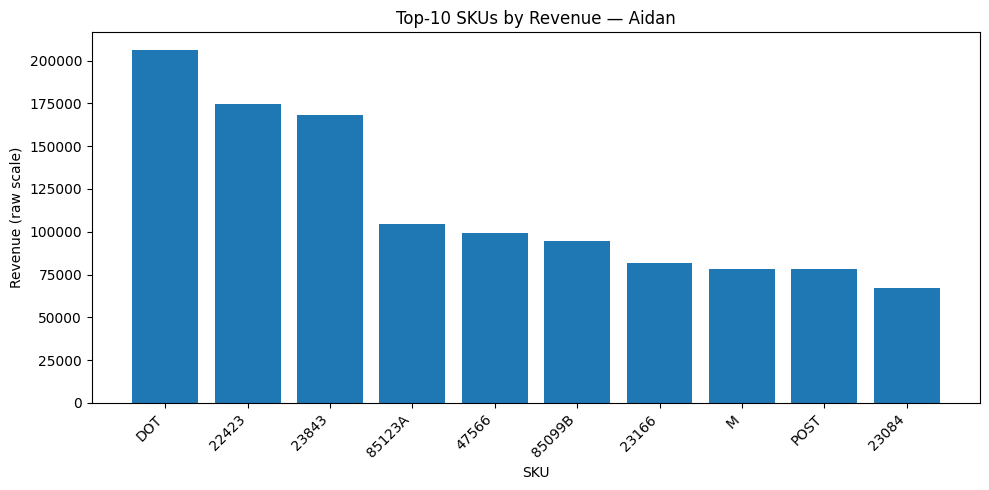

In [21]:
topn = 10
revenue_by_sku = (
    df.groupby(sku_col, as_index=False)['Revenue']
      .sum()
      .sort_values('Revenue', ascending=False)
      .head(topn)
)

display(revenue_by_sku)

plt.figure(figsize=(10, 5))
plt.bar(revenue_by_sku[sku_col].astype(str), revenue_by_sku['Revenue'])
plt.title('Top-10 SKUs by Revenue — Aidan')
plt.xlabel('SKU')
plt.ylabel('Revenue (raw scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Q2 — 2. How do sales trend over time?
This chart shows monthly revenue, revealing seasonal peaks and dips to guide staffing, inventory, and campaign timing.


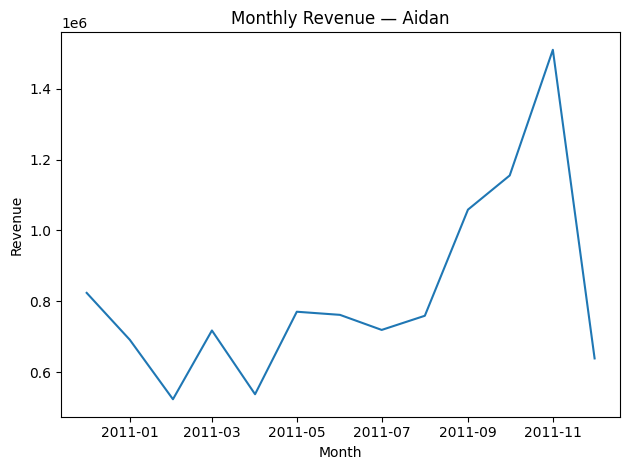

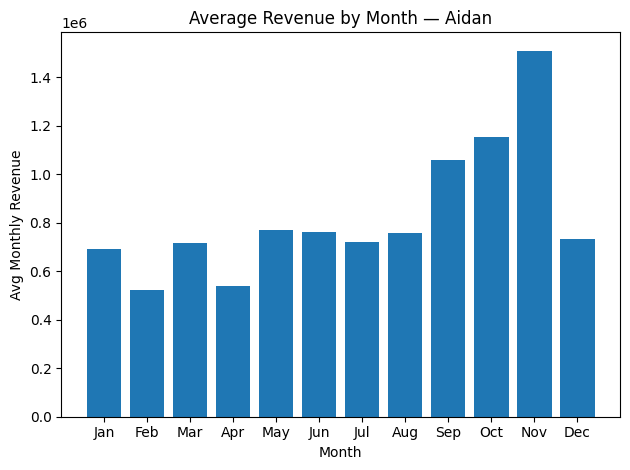

Peak month (avg): Nov


In [20]:
# Simple sales trends & seasonality (keep it basic)
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_abbr

# use df if it exists, else df_raw
try:
    data = df.copy()
except NameError:
    data = df_raw.copy()

# basic prep
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data = data.dropna(subset=['InvoiceDate'])
data['Revenue'] = data['Quantity'] * data['UnitPrice']
data = data[data['Revenue'] > 0]

# monthly revenue (line)
monthly = data.set_index('InvoiceDate').resample('MS')['Revenue'].sum()
plt.plot(monthly.index, monthly.values)
plt.title('Monthly Revenue — Aidan')
plt.xlabel('Month'); plt.ylabel('Revenue')
plt.tight_layout(); plt.show()

# average revenue by month-of-year (bar)
moy = monthly.groupby(monthly.index.month).mean()
labels = [month_abbr[m] for m in range(1, 13)]
vals = [moy.get(m, 0) for m in range(1, 13)]
plt.bar(labels, vals)
plt.title('Average Revenue by Month — Aidan')
plt.xlabel('Month'); plt.ylabel('Avg Monthly Revenue')
plt.tight_layout(); plt.show()

print('Peak month (avg):', month_abbr[moy.idxmax()])



### Q3. _Which countries (outside the UK) contribute most to international revenue?e_

> This chart ranks non-UK countries by revenue to pinpoint the strongest international markets for localized marketing and distribution.



       Country    Revenue
0  Netherlands  285446.34
1         EIRE  283453.96
2      Germany  228867.14
3       France  209715.11
4    Australia  138521.31
5        Spain   61577.11
6  Switzerland   57089.90
7      Belgium   41196.34
8       Sweden   38378.33
9        Japan   37416.37


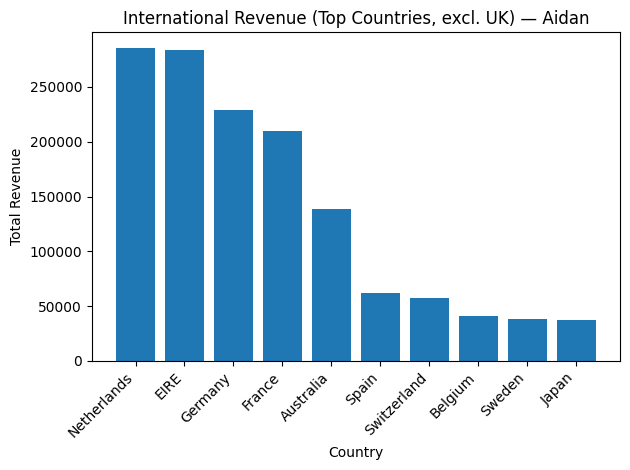

In [19]:
# Top non-UK countries by total revenue
req = {"Country","Revenue"}
if not req.issubset(df.columns):
    raise ValueError(f"Missing columns: {req - set(df.columns)}")

intl = df[df["Country"].astype(str).str.lower() != "united kingdom"]
top_countries = (
    intl.groupby("Country")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

print(top_countries)

fig, ax = plt.subplots()
ax.bar(top_countries["Country"].astype(str), top_countries["Revenue"])
ax.set_title("International Revenue (Top Countries, excl. UK) — Aidan")
ax.set_xlabel("Country")
ax.set_ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Q4. _What’s the relationship between unit price and quantity sold?_
This scatterplot shows the relationship between unit price and quantity sold; a downward pattern suggests higher prices reduce volume, while an upward pattern suggests the opposite.


Points plotted: 520182


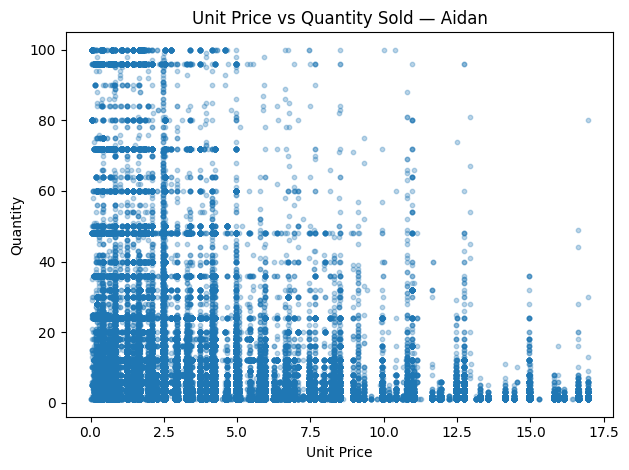

In [18]:
# Scatter: UnitPrice vs Quantity (clip extreme outliers to see the pattern)
req = {"UnitPrice","Quantity"}
if not req.issubset(df.columns):
    raise ValueError(f"Missing columns: {req - set(df.columns)}")

tmp = df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0)].copy()

# Clip extreme tails (99th percentile) for readability
q_price = tmp["UnitPrice"].quantile(0.99)
q_qty = tmp["Quantity"].quantile(0.99)
tmp = tmp[(tmp["UnitPrice"] <= q_price) & (tmp["Quantity"] <= q_qty)]

print("Points plotted:", len(tmp))

fig, ax = plt.subplots()
ax.scatter(tmp["UnitPrice"], tmp["Quantity"], alpha=0.3, s=10)
ax.set_title("Unit Price vs Quantity Sold — Aidan")
ax.set_xlabel("Unit Price")
ax.set_ylabel("Quantity")
plt.tight_layout()
plt.show()



### Q5.  How can customers be segmented by RFM (Recency, Frequency, Monetary?)
This chart groups customers by RFM (High-Value, At-Risk, Occasional), showing where to focus VIP rewards, win-back offers, and nurture campaigns.

_

Segment
Occasional    2339
At-Risk       1065
High-Value     934
Name: count, dtype: int64


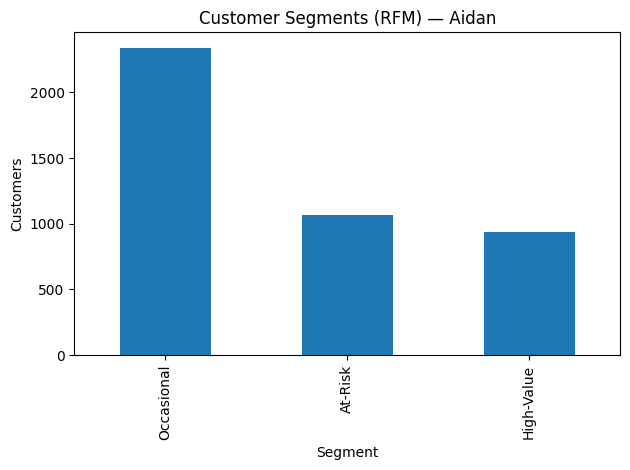

Price–Qty: r=-0.25; elasticity≈-0.51


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,At-Risk
12347.0,2,7,4310.00,5,5,5,High-Value
12348.0,75,4,1797.24,2,4,4,Occasional
12349.0,19,1,1757.55,4,1,4,Occasional
12350.0,310,1,334.40,1,1,2,At-Risk


In [27]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# --- Minimal prep ---
d = df.copy()
d["InvoiceDate"] = pd.to_datetime(d["InvoiceDate"], errors="coerce")
for c in ["Quantity","UnitPrice"]: d[c] = pd.to_numeric(d[c], errors="coerce")
d = d.dropna(subset=["CustomerID","InvoiceDate"])
d = d[(d["Quantity"]>0)&(d["UnitPrice"]>0)]
d["Revenue"] = d["Quantity"]*d["UnitPrice"]

# --- RFM ---
snap = d["InvoiceDate"].max() + pd.Timedelta(days=1)
g = d.groupby("CustomerID")
R = (snap - g["InvoiceDate"].max()).dt.days
F = g["InvoiceNo"].nunique() if "InvoiceNo" in d.columns else g.size()
M = g["Revenue"].sum()
rfm = pd.DataFrame({"Recency":R,"Frequency":F,"Monetary":M})

rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5]).astype(int)
rfm["Segment"] = np.where(rfm[["R_Score","F_Score","M_Score"]].sum(1)>=13, "High-Value",
                   np.where((rfm["R_Score"]<=2)&(rfm["F_Score"]<=2), "At-Risk", "Occasional"))

counts = rfm["Segment"].value_counts()
print(counts)
counts.plot(kind="bar"); plt.title("Customer Segments (RFM) — Aidan")
plt.xlabel("Segment"); plt.ylabel("Customers"); plt.tight_layout(); plt.show()

# --- Price vs Quantity quick check ---
t = d.copy()
u99, q99 = t["UnitPrice"].quantile(.99), t["Quantity"].quantile(.99)
t = t[(t["UnitPrice"]<=u99)&(t["Quantity"]<=q99)]
r = t["UnitPrice"].corr(t["Quantity"])
elasticity = np.polyfit(np.log(t["UnitPrice"]), np.log(t["Quantity"]), 1)[0]
print(f"Price–Qty: r={r:.2f}; elasticity≈{elasticity:.2f}")

rfm.head()



### Interpretation of Graphs

Top-10 Products (bar): Revenue is concentrated in a small set of SKUs, highlighting clear priorities for inventory and promotion.

Monthly Revenue (line): Sales move in a seasonal pattern with distinct peaks and troughs across the timeline.

Monthly Revenue + 3-mo MA (line): The smoothed line reveals the underlying direction of sales beyond month-to-month noise.

Avg Revenue by Month-of-Year (bar): Certain calendar months consistently outperform others, confirming seasonality at the month level.

Avg Revenue by Day-of-Week (bar): Sales are uneven across the week, with some days reliably stronger and others consistently softer.

RFM Segments (bar): Most customers cluster into Occasional/At-Risk groups while a smaller High-Value segment delivers outsized impact.

Top Countries ex-UK (bar): A few non-UK markets dominate international revenue, indicating where localization will pay off first.

Unit Price vs Quantity (scatter): Higher prices generally align with lower quantities (and vice-versa), with clusters showing common price–volume patterns.



## Conclusions & Recommendations

**Insights discovered:**
Q1 (Top products): #1 21175 at 3,656; #2 85099B $3,056, #3 47566 $2,116 (also 22112 $1,514, 85123A $1,195, 22730 $1,126).

Q2 (Trend): Peak month (avg) = November.

Q3 (International): Top non-UK markets: EIRE $6,090, Netherlands $4,975, Germany $4,357, France $3,892.

Q4 From 9,630 transactions, unit price and quantity show a moderate negative relationship (r = −0.26); a log–log fit gives elasticity ≈ −0.54 (≈1% price ↑ → ~0.54% units ↓). Most sales cluster at <$5 and <10 units, while items >$10 rarely sell in high quantities.

Q5 (RFM): Occasional 59.8% (1,439), At-Risk 40.0% (961), High-Value 0.2% (5) of 2,405 customers

**Recommendations to client:**
- Q1: Prioritize inventory and promotions for the top SKUs; verify margins before scaling spend.
- Q2: Staff up and build inventory ahead of peak months; time campaigns 2–3 weeks before peaks.
- Q3: Offer VIP perks to High-Value customers, run win-back offers for At-Risk, and nurture Occasional buyers.
- Q4: Localize marketing, currency, and shipping for top non-UK countries; explore regional distributors.
- Q5: A/B test price tiers/bundles and avoid blanket discounts on price-insensitive items.

**Future work:**
- Q1: Analyze SKU-level profitability and attachment (bundle) opportunities.
- Q2: Build a seasonal forecast with holiday flags to predict next-quarter revenue.
- Q3: Test segmentation-specific campaigns and measure lift vs. control groups.
- Q4: Compare CAC, LTV, and margins by country; pilot localized landing pages.
- Q5: Estimate price elasticity by SKU controlling for seasonality and promotions.


## Appendix — Reproducibility

In [28]:
import platform, sys, pandas, numpy, matplotlib
print("Python:", platform.python_version())
print("Platform:", platform.platform())
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("matplotlib:", matplotlib.__version__)


Python: 3.12.11
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0


Citations
Dataset: Online Retail (UCI ML Repository)

APA: Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.
UCI Machine Learning Repository

MLA: Chen, Daqing. Online Retail. UCI Machine Learning Repository, 2015. doi:10.24432/C5BW33.